In [8]:
import numpy as np
import pandas as pd
import scipy.spatial as sp
import scipy.interpolate as snt
import biocircuits

import colorcet as cc
import holoviews as hv
import bokeh.io
import bokeh.plotting
import bokeh_catplot

from datetime import date

hv.extension('matplotlib')
bokeh.io.output_notebook()

colors = cc.palette.glasbey_category10

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Loading BokehJS ...

In [9]:
%run lattice_signaling.py

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

All lattice_signaling.py functions imported.


In [10]:
%load_ext blackcellmagic

<hr>

How does the rate of division change depending on the volume? By a sigmoid function! For large (uncompressed) cells, there is a saturating maximum division rate $r_\text{exp}$ that will be the rate during exponential growth. Once you get closer to the volume at which cells become inhibited from dividing ($V_i$), your rate should start dropping. Below the threshold, it should drop to zero or near-zero. I'll call this function $r(V)$ and define it using a power law relationship. 

\begin{align}
r(V) = \left\{
\begin{matrix}
 r_\text{exp}\left(1 - \left(\frac{V_i}{V}\right)^2 \right) & V \geq V_i \\
 0 & V < V_i
 \end{matrix}
\right.
\end{align}

This is basically modified from the Pareto distribution CDF with a power parameter of 2 for convenience.

In [11]:
def div_rate(V, r_exp, V_i):
    """Division rate as a function of cell volume using a power law relationship."""
    return r_exp * (1 - (V_i / V)**2) * (V >= V_i)

In [12]:
V_space = np.logspace(0, 2, 100)
r_exp = 10
V_i = 3 * np.sqrt(3) / 2

p = bokeh.plotting.figure(
    height=350,
    width=400,
    x_axis_label="Volume",
    y_axis_label="Division rate",
    x_axis_type="log",
    title=f"Max rate = {r_exp:.1f}, V_i = {V_i:.2f}"
)

p.circle(V_space, div_rate(V_space, r_exp=r_exp, V_i = V_i))

bokeh.io.show(p)

In [13]:
# Start with 16 cells. End with ~400
cells = np.random.normal(loc=1/16, scale=1/48, size=16)

# Doubling time and dt
r_ext=1
V_i=1.4/1000
dt = 0.01

# Initialize array holding population size over time
pop = np.empty((251, 2))
pop[0, 0] = 0
pop[0, 1] = cells.size

# Iterate over time. At each time, use the division rate to parameterize division as
#  a Poisson process in that time-step. For the Poisson process, the probability of
#  arrival in a given time is given by the inverse CDF of the exponential distribution.
for i in np.arange(1, 251):
    rates = div_rate(V=cells, r_exp=r_exp, V_i=V_i)
    probs = 1 - np.exp(-rates * dt)
    dividing_cells = probs > np.random.uniform(low=0, high=1, size=cells.size)
    cells = np.concatenate((cells[~dividing_cells], cells[dividing_cells]/2, cells[dividing_cells]/2))
    pop[i, :] = i * dt, cells.size

:Points   [x,y]
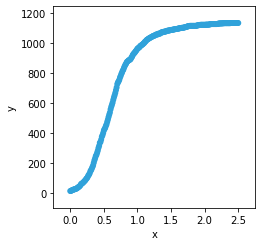

In [14]:
hv.Points(pop)

In [15]:
def init_unique_IDs(n, sep=":", empty="-"):
    arr = np.array([":".join([str(i).zfill(3), "00", empty*15]) for i in range(n)])
    return arr

In [16]:
def daughter_IDs(mom_ID, sep=":"):
    """Returns a Numpy array of unique ID strings after the cell at index mom divides into two daughter cells."""
    
    new_id1 = mom_ID.split(sep)
    
    # Increment generation to get first daughter's ID
    gen = int(new_id1[1]) + 1
    new_id1[1] = str(gen).zfill(2)
    
    assert (gen < len(new_id1[2])), "Number of generations has exceeded unique ID container size"
    
    # Increment lineage to get both daughters' IDs
    new_id1 = new_id1[:2] + [new_id1[2][:-gen] + '0' + new_id1[2][15 - (gen - 1):]]
    new_id2 = new_id1[:2] + [new_id1[2][:-gen] + '1' + new_id1[2][15 - (gen - 1):]]
    
    # Append daughters to IDs
    return np.array([sep.join(new_id1), sep.join(new_id2)])


In [17]:
def simulate_lattice_stoch_div(
    R, sigma, t, desired_cells, doubling_time=np.log(2), *args, **kwargs
):
    """
    Simulates a lattice of cells dividing stochastically up to confluence 
    """

    # Initialize lattice and Voronoi
    X = hex_grid_circle(radius=R, sigma=sigma, r=1)
    vor = sp.Voronoi(X)

    # Initialize unique IDs
    unique_IDs = init_unique_IDs(X.shape[0])

    # Initialize output containers
    df = pd.DataFrame(
        {
            "cell": unique_IDs,
            "step": 0,
            "time": t[0],
            "X_coord": X[:, 0],
            "Y_coord": X[:, 1],
        }
    )

    vor_out = [vor]
    df_out = [df]

    for t_step in range(1, t.shape[0]):

        # Get cell volumes for valid cells as a 2D array
        volumes = np.array([[idx, vol] for idx, vol in enumerate(voronoi_areas(vor))])
        volumes = np.array([volumes[i, :] for i, _ in valid_regions(vor, R)])

        # Based on cell volume, get division rates and corresponding probabilities of
        #  dividing within the time-step.
        rates = div_rate(
            V=volumes[:, 1],
            r_exp=np.log(2) / doubling_time,
            V_i=1.0 * np.pi * R ** 2 / desired_cells,
        )
        probs = 1 - np.exp(-rates * np.abs(t[t_step] - t[t_step - 1]))

        mothers = np.array([i for i in volumes[:, 0]]).astype(np.int32)
        mothers = mothers[
            probs > np.random.uniform(low=0, high=1, size=volumes.shape[0])
        ]
        mothers_coords = X[mothers]

        # Execute divisions
        for mom_coords in mothers_coords:

            # Get index of mother cell
            mom_idx = next((i for i, x in enumerate(X) if np.all(x == mom_coords)))

            # Get the locations of daughter cells after division
            vertices = np.array(
                [vor.vertices[i] for i in vor.regions[vor.point_region[mom_idx]]]
            )
            daughters = divide_cell(centroid=vor.points[mom_idx], vertices=vertices)

            # Append arrays with daughter cells' locations and new IDs
            X = np.concatenate((X, daughters))
            unique_IDs = np.concatenate((unique_IDs, daughter_IDs(unique_IDs[mom_idx])))

            # Remove mom from arrays
            X = np.delete(X, mom_idx, axis=0)
            unique_IDs = np.delete(unique_IDs, mom_idx, axis=0)

            # Re-calculate Voronoi
            vor = sp.Voronoi(X)
        
        # Append data to containers
        df = pd.DataFrame(
            {
                "cell": unique_IDs,
                "step": t_step,
                "time": t[t_step],
                "X_coord": X[:, 0],
                "Y_coord": X[:, 1],
            }
        )
        vor_out.append(vor)
        df_out.append(df)

    # Construct output DataFrame
    df_out = pd.concat(df_out).reset_index(drop=True)

    return vor_out, df_out

In [18]:
R = 5

vor_ls, df = simulate_lattice_stoch_div(
    R=R,
    sigma=0.2,
    t=np.linspace(0, 8, 24),
    desired_cells=400
)

In [19]:
vor_ls[-1].points.shape

(390, 2)

:Layout
   .Polygons.I    :Polygons   [x,y]
   .Polygons.II   :Polygons   [x,y]
   .Polygons.III  :Polygons   [x,y]
   .Polygons.IV   :Polygons   [x,y]
   .Polygons.V    :Polygons   [x,y]
   .Polygons.VI   :Polygons   [x,y]
   .Polygons.VII  :Polygons   [x,y]
   .Polygons.VIII :Polygons   [x,y]
   .Polygons.IX   :Polygons   [x,y]
   .Polygons.X    :Polygons   [x,y]
   .Polygons.XI   :Polygons   [x,y]
   .Polygons.XII  :Polygons   [x,y]
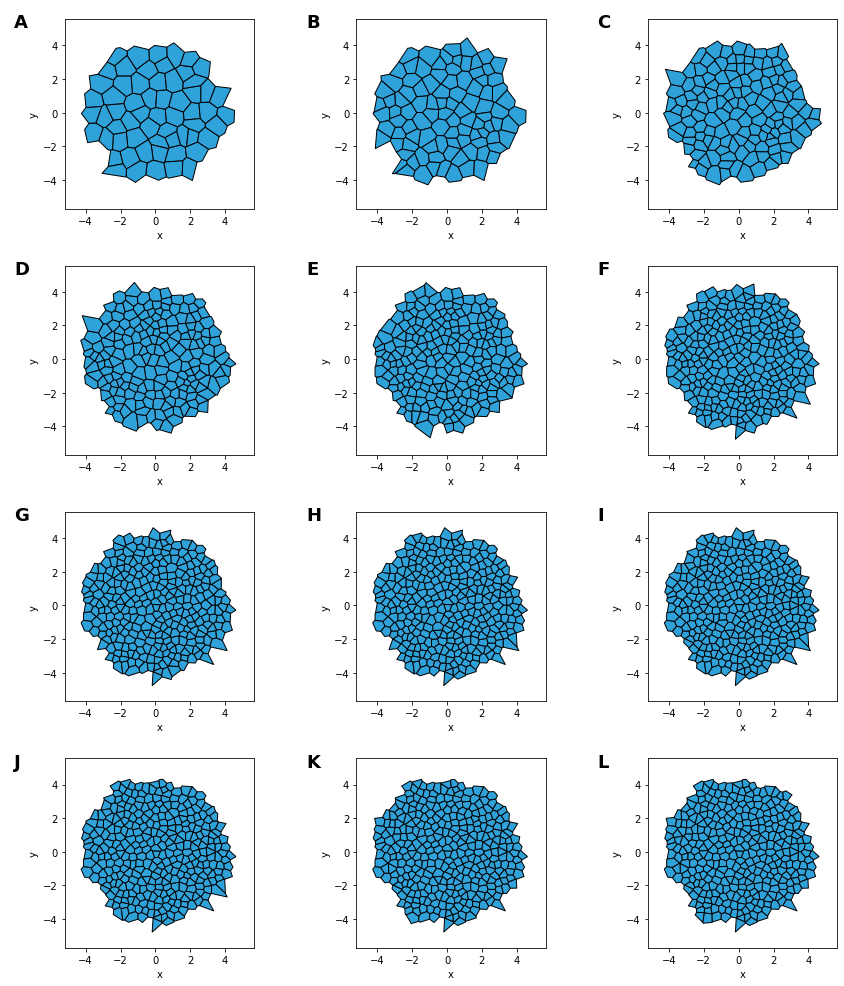

In [20]:
plots = []

for vor in vor_ls[::2]:
    polygons = valid_regions(vor=vor, R=R)
    polygons = [{('x', 'y'): region[1]} for region in polygons]
    plot = hv.Polygons(polygons).opts(aspect=1)
    plots.append(plot)
    
hv.Layout(plots).cols(3)

In [21]:
# df.to_csv('lattice_df.csv')

<hr>

Why is this useful? you can simulate different circuits on teh same dividing lattice - more controlled experiment, and less computationally expensive.

Now let's make a lattice object that can hold these attributes.

<hr>

In [22]:
def iterable_to_timeseries(t_series, itr, func_type="step", rect_func=None, *args, **kwargs):
    """Returns a function that returns the element in itr corresponding to the time-points in t.
    t_series must be a 1D Numpy array that is unique and sorted ascending."""
    
    assert np.all(t_series[:-1] < t_series[1:]), "t_series must be a unique, increasing 1D Numpy array."
    
    # Step function that returns objects of arbitrary size/shape
    if "step".startswith(func_type):
        
        # Make itr rectangular if desired. Otherwise, func returns objects of arbitrary shape/size
        if rect_func is not None:
            itr = rect_fun(itr)
        
        def func(t): 
            assert (t >= t_series[0]) & (t < t_series[-1]), "time out of range: function not defined"
            idx = np.searchsorted(t_series, t, side="right",)
            
            return itr[idx - 1]
    
    # Interpolation function
    elif "interpolate".startswith(func_type):
        
        # Turn iterable into a rectangular Numpy array of shape (t_series.size, n), where n is the
        #  number of functions to be interpolated
        y = rect_fun(itr)
        n = y.shape[1]
        
        # Interpolate function(s)
        tck = [scipy.interpolate.splrep(t_series, y[:, i]) for i in range(n)]
        
        # Return interpolant if it's in range
        def func(t): 
            assert (t >= t_series[0]) & (t < t_series[-1]), "time out of range: function not defined"
            
            return np.array(
                [scipy.interpolate.splev(t, tck[i]) for i in range(n)]
            )
    
    return func

In [23]:
# Given a cell ID and a list of past IDs, find the ID that is the closest ancestor
def cell_ancestor(cell_ID, ID_list, sep=":", empty="-"):
    """
    """
    if cell_ID in ID_list:
        return cell_ID
    
    cell_ID = cell_ID.split(sep)
    
    arr = [ID.split(sep) for ID in ID_list if ID.startswith(cell_ID[0])]
    
    target = cell_ID[2].replace(empty, '')
    for i, _ in enumerate(target):
        for ID in arr:
            if ID[2].endswith(target[i + 1:]):
                return sep.join(ID)
    
    print(cell_ID)
    assert False, "cell_ID has no ancestor in ID_list"

In [24]:
def lattice_df_to_Voronois(
    df,
    unique_ID_col="cell",
    time_col="time",
    coord_cols=["X_coord", "Y_coord"],
    *args,
    **kwargs
):
    """Return a 3-tuple containing a Numpy array of time-points, a list of lists of unique 
    cell IDs at each time-point, and a list of SciPy Voronoi objects at each time-point,
    according to the Pandas DataFrame argument `df`. 
    coord_cols should be in order of coordinate axes (i.e. for 2D coordinates, it should be 
    ['X coordinate column name','Y coordinate column name'])
    """
    # Order rows by time, then group by time
    grouped_by_time = df.sort_values(time_col).groupby(time_col)

    # At each time, generate a Voronoi object from the DataFrame
    time_array = np.empty(len(grouped_by_time))
    unique_IDs_list = []
    voronoi_list = []
    for i, tupl in enumerate(grouped_by_time):
        t, df_t = tupl
        time_array[i] = t
        unique_IDs_list.append(df_t.loc[:, unique_ID_col].values)
        voronoi_list.append(sp.Voronoi(df_t.loc[:, coord_cols].values))

    return time_array, unique_IDs_list, voronoi_list

In [25]:
class VoronoiLattice:
    
    def __init__(self, t_points, R, uIDs_ls, voronoi_ls, init_state = "blank"):

        self.t_points = np.array(t_points).flatten()
        self.R = R
        self.uIDs_ls = uIDs_ls
        self.voronoi_ls = voronoi_ls
        self.coordinates_ls = [np.array(vor.points) for vor in voronoi_ls]
        self.init_state = init_state

    def voronoi(self, t):
        """
        Returns the Scipy Voronoi object at the given time-point t.
        Order is preserved between unique IDs, self.coordinates(t), and the Voronoi 
        object returned by self.voronoi(t).
        """
        assert (t <= self.t_points[-1]), f"time out of range: lattice not defined at time {t}"
        if "blank".startswith(self.init_state):
            assert (t >= self.t_points[0]), f"time out of range: lattice not defined at time {t}"
        elif "static".startswith(self.init_state):
            t = np.maximum(t, 0)
        else: 
            assert False, "invalid initial state for VoronoiLattice object"
        
        idx = np.searchsorted(self.t_points, t, side="right") - 1
        return self.voronoi_ls[int(idx)]

    def points(self, t):
        """
        Returns the coordinates of cells at the given time-point t.
        Order is preserved between unique IDs, points, and the Voronoi 
        object at time t.
        """
        assert (t <= self.t_points[-1]), f"time out of range: lattice not defined at time {t}"
        if "blank".startswith(self.init_state):
            assert (t >= self.t_points[0]), f"time out of range: lattice not defined at time {t}"
        elif "static".startswith(self.init_state):
            t = np.maximum(t, 0)
        else: 
            assert False, "invalid initial state for VoronoiLattice object"
        
        idx = np.searchsorted(self.t_points, t, side="right") - 1
        return self.coordinates_ls[int(idx)]

    def uIDs(self, t):
        """
        Returns the list of unique IDs of each cell at the given time-point t. 
        Order is preserved between unique IDs, self.coordinates(t), and the Voronoi 
        object returned by self.voronoi(t).
        """
        assert (t <= self.t_points[-1]), f"time out of range: lattice not defined at time {t}"
        if "blank".startswith(self.init_state):
            assert (t >= self.t_points[0]), f"time out of range: lattice not defined at time {t}"
        elif "static".startswith(self.init_state):
            t = np.maximum(t, 0)
        else: 
            assert False, "invalid initial state for VoronoiLattice object"
        
        idx = np.searchsorted(self.t_points, t, side="right") - 1
        return self.uIDs_ls[int(idx)]

    def n_cells(self, t):
        """
        Returns the number of cells at time t
        """
        return self.uIDs(t).size
                
    def ancestor_uIDs(self, t_past, t_future, kwargs=dict()):
        """        
        Returns the list of unique IDs of each cell at the given time-point t. 
        Order is preserved between unique IDs, self.coordinates(t), and the Voronoi 
        object returned by self.voronoi(t).
        """
        past_IDs = self.uIDs(t_past)
        return np.array(
            [
                cell_ancestor(future_ID, past_IDs, **kwargs)
                for future_ID in self.uIDs(t_future)
            ]
        )

    def map_array(self, t_past, t_future):
        """
        Returns the indices to map an array at time t_past to time t_future.
        Array elements are re-ordered to match the ordering of cells at time 
        t_future and elements are duplicated based on cell division events.
        """
        past_uIDs = self.uIDs(t_past)
        future_uIDs = self.ancestor_uIDs(t_past, t_future)
        mapping = np.concatenate(
            [np.argwhere(past_uIDs == ID).flatten() for ID in future_uIDs]
        )

        return mapping

    def map_matrix(self, t_past, t_future):
        """
        Returns a tuple of indices to map a square matrix at time t_past to 
        time t_future. Matrix rows and columns are re-ordered to match the 
        ordering of cells at time t_future and rows/cols are duplicated 
        based on cell division events.
        """
        mapping = self.map_array(t_past, t_future)
        mapping = np.array([[[x, y] for y in mapping] for x in mapping])

        return mapping[:, :, 0], mapping[:, :, 1]

    def map_array_r(self, t_past, t_future):
        """
        Returns the indices to reverse self.map_array().
        """
        past_uIDs = self.uIDs(t_past)
        future_uIDs = self.ancestor_uIDs(t_past, t_future)
        mapping = np.array(
            [np.argwhere(future_uIDs == ID).flatten()[0] for ID in past_uIDs]
        )

        return mapping

    def map_matrix_r(self, t_past, t_future):
        """
        Returns a tuple of indices to reverse self.map_matrix()
        """
        mapping = self.map_array_r(t_past, t_future)
        mapping = np.array([[[x, y] for y in mapping] for x in mapping])

        return mapping[:, :, 0], mapping[:, :, 1]

    def where_duplicated(self, t_past, t_future):
        """
        Return the indices of duplicated entries in 
            self.ancestor_uIDs(t_past, t_future)
        """
        future_uIDs = self.ancestor_uIDs(t_past, t_future)
        unique = np.zeros(future_uIDs.size, dtype=bool)
        unique[np.unique(future_uIDs, return_index=True)[1]] = True
        return np.nonzero(~unique)[0]

    def transition_mtx(
        self,
        t,
        t_future=None,
        trans_mtx_func=lattice_adjacency,
        ancestor_kwargs=dict(),
        init_kwargs=dict()
    ):
        """
        Returns the graph transition matrix of the lattice at a given time t. If t_future is supplied, 
        the matrix is expanded and to match the lattice shape at time t_future for delay calculations.
        """
        if "blank".startswith(self.init_state):
            assert (t >= self.t_points[0]), "time out of range: lattice not defined"
        elif "static".startswith(self.init_state):
            t = np.maximum(t, 0)
        else: 
            assert False, "invalid initial state for VoronoiLattice object"

        # If no future time supplied, return the transition matrix
        if t_future is None:
            return lattice_adjacency(self.voronoi(t), R=self.R)

        assert t <= t_future, "t must be less than or equal to t_future"
        assert (t_future >= self.t_points[0]) & (
            t_future <= self.t_points[-1]
        ), "t_future out of range: lattice not defined"

        # Else, calculate the transition matrix and re-map it to its
        #  size at time t_future
        mtx = lattice_adjacency(self.voronoi(t), R=self.R)[self.map_matrix(t, t_future)]

        # Replace duplicated columns with zeros, so duplicated cells do not affect signaling.
        mtx[:, self.where_duplicated(t, t_future)] = 0
        return mtx

        # Note: The choice of which cell in a group of duplicate cells has nonzero entries in its
        # column is arbitrary and should not affect the result. Since the cells undergo numeric
        # integration identically, the result should be the same regardless of which cell is chosen.

In [26]:
def df_to_VoronoiLattice(df, R, kwargs=dict()):
    t_points, uIDs_ls, voronoi_ls = lattice_df_to_Voronois(df)
    return VoronoiLattice(t_points=t_points, R=R, uIDs_ls=uIDs_ls, voronoi_ls=voronoi_ls, **kwargs)

def csv_to_VoronoiLattice(path, R, csv_kwargs=dict(), lattice_kwargs=dict()):
    df = pd.read_csv(path, **csv_kwargs)
    return df_to_VoronoiLattice(df=df, R=R, kwargs=lattice_kwargs)

In [27]:
lax = csv_to_VoronoiLattice('lattice_df.csv', R=5, csv_kwargs=dict(index_col=0))

In [28]:
lax.t_points

array([0.        , 0.34782609, 0.69565217, 1.04347826, 1.39130435,
       1.73913043, 2.08695652, 2.43478261, 2.7826087 , 3.13043478,
       3.47826087, 3.82608696, 4.17391304, 4.52173913, 4.86956522,
       5.2173913 , 5.56521739, 5.91304348, 6.26086957, 6.60869565,
       6.95652174, 7.30434783, 7.65217391, 8.        ])

In [29]:
lax.n_cells(8)

396

In [30]:
np.sum(lax.transition_mtx(0, 1), axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

<hr>

In [36]:
# class LatticeDDE:
    
#     self.time_bins = []
#     self.E_past_funcs = []
    
#     def __init__(self, lattice, n_species, sender_fun, n_senders, t_points):
#         self.lattice = lattice
#         self.t_points = t_points
#         self.t0 = t_points[0]
#         self.n_species = n_species
#         self.n_cells0 = lattice.n_cells(t_points[0])
#         self.sender_lineages = sender_fun(lattice.points(lattice.t_points[0]), n_senders)
    
#     def senders(self, t):
#         """Returns indices of sender cells at a given time."""
#         return np.nonzero(
#             [ID.startswith(tuple(self.sender_lineages)) for ID in lattice.uIDs(t)]
#         )[0]
    
#     def initialize(self, init_condition, I_t, init_args):
#         """Set function for initial conditions"""
#         self.I_t = I_t
#         self.E_init = lambda t: init_condition(t, lattice, self.senders, I_t, *init_args)
#         self.time_bins = [t0]
#         self.E_past_funcs = [self.E_init]
    
#     def E_past(self, t):
#         """Define past expression as a left-sided piecewise function."""
#         bin_idx = next((i for i, t_bin in enumerate(self.time_bins) if t < t_bin))
#         return self.E_past_funcs[bin_idx](t)
    
#     def simulate(
#         self, 
#         dde_rhs,
#         delays,
#         dde_args=(),
#         n_time_points_per_step=20,
#     ):
#         self.E_dense = []
#         self.t_dense = []
#         self.uIDs_dense = []

#         assert all([delay >= 0 for delay in delays]), "Negative delays not permitted."
#         assert not all(
#             [delay == 0 for delay in delays]
#         ), "At least one delay must be greater than 0."

#         # Extract shortest and longest non-zero delay parameters
#         min_tau = min([x for x in delays if x > 0])
#         max_tau = max([x for x in delays if x > 0])

#         self.rhs = lambda E, t, E_past, t_future: dde_rhs(
#                 E,
#                 t,
#                 E_past,
#                 t_future,
#                 senders_t=senders_t,
#                 I_t=I_t,
#                 lattice=lattice,
#                 delays=delays,
#                 params=dde_args,
#             )
        
#         # Integrate from t0 to t0 + max_tau in steps of size min_tau
#         t_step = np.linspace(t0, t0 + min_tau, n_time_points_per_step + 1)
#         E = E_init(t0)[lattice.map_array(t0, t0 + max_tau)]
#         E_step = [E]
#         E_dense.append(E)

#         first_step_done = False
#         while not first_step_done:
#             for t in t_step[:-1]:
#                 if t >= t0 + max_tau:
#                     first_step_done = True
#                     break
#                 dE_dt = rhs(E, t, E_past, t0 + max_tau)
#                 E = np.maximum(E + dE_dt, 0)
#                 E_dense.append(E)
#                 E_step.append(E)

#                 t_dense.append(t)
#                 print(t_dense)
#                 uIDs_dense.append(lattice.ancestor_uIDs(t, t0 + max_tau))

#             # Make B-spline for t_step
#             E_step = np.array(E_step)
#             tck = [
#                 [snt.splrep(t_step, E_step[:, cell, i]) for i in range(E.shape[1])]
#                 for cell in range(lattice.n_cells(t0 + max_tau))
#             ]

#             # Interpolant of E from t_step
#             time_bins.append(t_step[-1])
#             E_past_funcs.append(
#                 lambda t: np.array(
#                     [
#                         [snt.splev(t, tck[cell][i]) for i in range(E.shape[1])]
#                         for cell in range(lattice.n_cells(t0 + max_tau))
#                     ]
#                 )
#             )
#             print("time bins:", time_bins)

#             t_step = np.linspace(t_step[-1], t_step[-1] + min_tau, n_time_points_per_step + 1)

#         print("First step done!")



In [108]:
import tqdm
from math import ceil


def ddeint_Lattice(
    dde_rhs,
    E0,
    t_out,
    delays,
    I_t,
    lattice,
    dde_args=(),
    E0_args=(),
    n_time_points_per_step=20,
    sender_fun=get_center_cells,
    n_senders=1,
    progress_bar=False,
):
    """Solve a delay differential equation on a growing lattice of cells."""
    
    assert all([delay > 0 for delay in delays]), "Non-positive delays are not permitted."

    t0 = t_out[0]

    # Extract shortest and longest non-zero delay parameters
    min_tau = min(delays)

    # Get senders at time t0 and store lineages
    senders0 = sender_fun(lattice.voronoi(t0).points, n_senders)
    sender_lineages = np.array([str(sender).zfill(3) for sender in senders0])

    # Make a function to fetch sender indices
    def senders_t(t):
        """Returns indices of sender cells at a given time."""
        return np.nonzero(
            [ID.startswith(tuple(sender_lineages)) for ID in lattice.uIDs(t)]
        )[0]

    # Make a shorthand for RHS function
    def rhs(E, t, E_past, t_future):
        return dde_rhs(
            E,
            t,
            E_past,
            t_future,
            senders_t=senders_t,
            I_t=I_t,
            lattice=lattice,
            delays=delays,
            params=dde_args,
        )

    # Define a piecewise function to fetch past values of E
    time_bins = [t0]
    E_past_funcs = [lambda t, *args: E0(t, lattice, senders_t, I_t, *E0_args)]

    def E_past(t_past, t_future):
        """Define past expression as a piecewise function."""
        bin_idx = next((i for i, t_bin in enumerate(time_bins) if t_past < t_bin))
        return E_past_funcs[bin_idx](t_past)[
            lattice.map_array(time_bins[bin_idx], t_future)
        ]

    # Get initial conditions
    E = E0(t0, lattice, senders_t, I_t, *E0_args)

    # Integrate in steps of size min_tau. Stops before the last step.
    t_step = np.linspace(t0, t0 + min_tau, n_time_points_per_step + 1)
    n_iters = ceil((t_out[-1] - t0) / min_tau) - 1
    iterator = range(n_iters)
    if progress_bar:
        iterator = tqdm.tqdm(iterator)
    for j in iterator:

        # Expand E to match the size of the lattice at the end of the step
        E = E[lattice.map_array(t_step[0], t_step[-1])]
        E_step = [E]

        # Perform integration
        for i, t in enumerate(t_step[:-1]):
            dE_dt = rhs(E, t, E_past, t_step[-1])
            dt = t_step[i + 1] - t
            E = np.maximum(E + dE_dt * dt, 0)
            E_step.append(E)

        # Make B-spline
        E_step = np.array(E_step)
        tck = [
            [snt.splrep(t_step, E_step[:, cell, i]) for i in range(E.shape[1])]
            for cell in range(lattice.n_cells(t_step[-1]))
        ]

        # Append spline interpolation to piecewise function
        time_bins.append(t_step[-1])
        interp = lambda t, k=j + 1: np.array(
            [
                [snt.splev(t, tck[cell][i]) for i in range(E.shape[1])]
                for cell in range(lattice.n_cells(time_bins[k]))
            ]
        )
        E_past_funcs.append(interp)

        # Get time-points for next step
        t_step += min_tau

    # Integrate last step
    t_step = np.concatenate(
        (
            np.arange(t_step[0], t_out[-1], min_tau / n_time_points_per_step),
            (t_out[-1],),
        )
    )

    # Expand E to the lattice size at the end of the step
    E = E[lattice.map_array(t_step[0], t_step[-1])]
    E_step = [E]

    # Perform integration
    for i, t in enumerate(t_step[:-1]):
        dE_dt = rhs(E, t, E_past, t_step[-1])
        dt = t_step[i + 1] - t
        E = np.maximum(E + dE_dt * dt, 0)
        E_step.append(E)

    # Make B-spline
    E_step = np.array(E_step)

    tck = [
        [snt.splrep(t_step, E_step[:, cell, i]) for i in range(E.shape[1])]
        for cell in range(lattice.n_cells(t_step[-1]))
    ]

    # Append interpolation to piecewise function
    time_bins.append(t_out[-1])
    interp = lambda t: np.array(
        [
            [snt.splev(t, tck[cell][i]) for i in range(E.shape[1])]
            for cell in range(lattice.n_cells(time_bins[-1]))
        ]
    )
    E_past_funcs.append(interp)

    def E_sol(t):
        """Returns interpolated solution E(t)."""
        bin_idx = next((i for i, t_bin in enumerate(time_bins) if t < t_bin))
        return E_past_funcs[bin_idx](t)[lax.map_array_r(t, time_bins[bin_idx])]

    E_out = [E_sol(t) for t in t_out[:-1]]
    E_out.append(E_past_funcs[-1](t_out[-1]))

    return E_out

In [109]:
def rhs_tc_delay_cis(
    E, 
    t, 
    E_past, 
    t_future, 
    senders_t, 
    I_t, 
    lattice, 
    delays, 
    params,
):
    
    tau = delays[0]
    alpha, k_s, p_s, mu, delta = params
    
    # Get the signal input E_bar to each cell after a delay tau
    A = lattice.transition_mtx(t - tau, t_future)
    E_tau = E_past(t - tau, t_future)
    E_bar = (np.dot(A, E_tau) / k_s)

    # Evaluate Hill term
    f = biocircuits.reg.act_hill(E_bar / (k_s + delta * E_tau), p_s)
    
    # Calculate change in expression
    E = E[lattice.map_array(t - tau, t_future)]
    dE_dt = alpha * f - mu * E
    
    for sender in senders_t(t_future):
        dE_dt[sender, :] = I_t(t) - (mu * E)[sender, :]
        
    return dE_dt

In [110]:
def E0(t, lattice, senders_t, I_t, *args, **kwargs):
    """Initial expression for lattice."""
    E = np.zeros((lattice.n_cells(t), 1), dtype=np.float32)
    for sender in senders_t(t):
        E[sender, :] = I_t(t)
    
    return E

In [111]:
I_t = lambda t: 1

alpha = 1
k_s = 0.3
p_s = 2
mu = 0.2
delta = 0
tau = 0.5

params = alpha, k_s, p_s, mu, delta
delays = (tau,)

In [112]:
lax = csv_to_VoronoiLattice(
    "lattice_df.csv",
    R=5,
    csv_kwargs=dict(index_col=0),
    lattice_kwargs=dict(init_state="static"),
)

In [114]:
result = ddeint_Lattice(
    rhs_tc_delay_cis,
    E0,
    np.linspace(0, 8, 200),
    delays,
    I_t,
    lattice=lax,
    dde_args=params,
    n_time_points_per_step=5,
    progress_bar=True,
)

100%|██████████| 15/15 [00:28<00:00,  1.92s/it]


<hr>

In [107]:
def result_to_df(
    t,
    lattice,
    result,
    time_col="time",
    species_cols=["expression"],
    uID_col="",
    coord_cols=["X_coord", "Y_coord"],
):
    
    dfs = []
    for step, time in enumerate(t):
        df_dict = {
            "step": step,
            time_col: time,   
        }
        
        for s in species_cols:
            df_dict[s] = result[step]
        
        df = pd.DataFrame()
    
    return df
    